In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, precision_recall_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/zhaoz127/haha/refs/heads/main/Customer_Data.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Data Processing

### Prepare_Missing Value

In [6]:
missing_values = df.isnull().sum()
print(missing_values)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


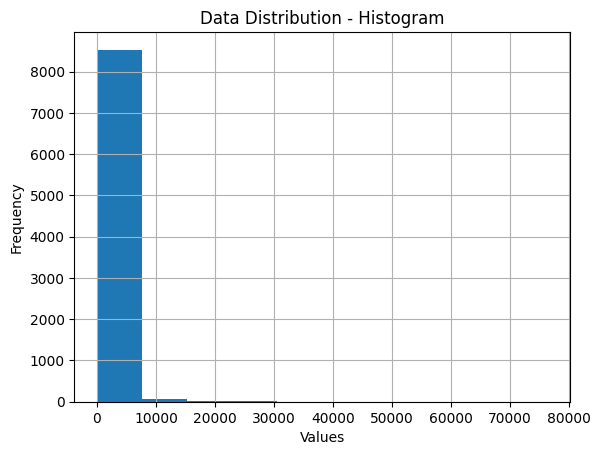

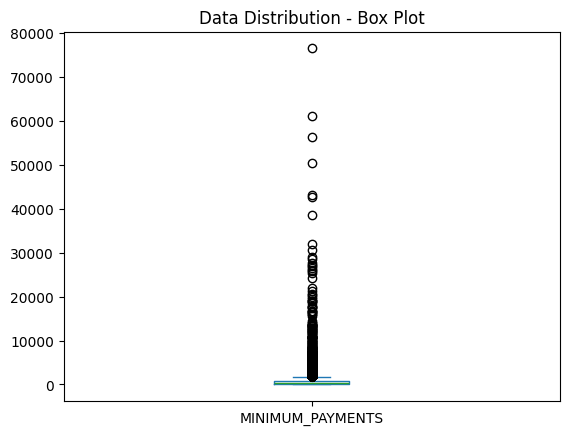

In [7]:
import matplotlib.pyplot as plt
# Plot a histogram
df['MINIMUM_PAYMENTS'].hist(bins=10)
plt.title('Data Distribution - Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Plot a box plot
df['MINIMUM_PAYMENTS'].plot(kind='box')
plt.title('Data Distribution - Box Plot')
plt.show()


In [8]:
# Fill missing values in 'MINIMUM_PAYMENTS' with the median
# Because the data is right-skewed, the median is a better measure of central tendency
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

df['MINIMUM_PAYMENTS'].isnull().sum()

0

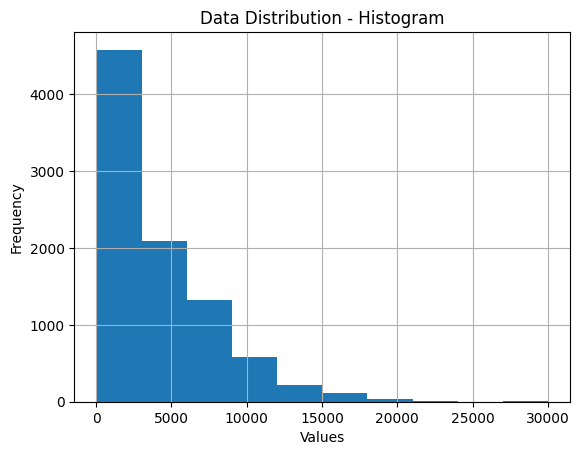

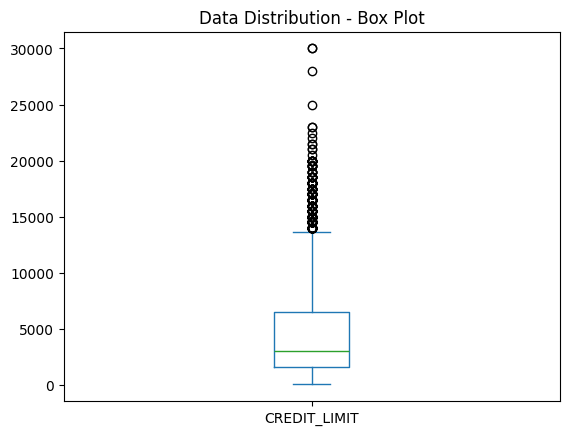

In [9]:
# Plot a histogram
df['CREDIT_LIMIT'].hist(bins=10)
plt.title('Data Distribution - Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Plot a box plot
df['CREDIT_LIMIT'].plot(kind='box')
plt.title('Data Distribution - Box Plot')
plt.show()

In [10]:
# Fill missing values in 'CREDIT_LIMIT'ith the median
# Because the data is right-skewed, the median is a better measure of central tendency
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

df['CREDIT_LIMIT'].isnull().sum()

0

### Duplicate Value

In [11]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


## EDA

In [12]:
df_columns = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
                     'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']


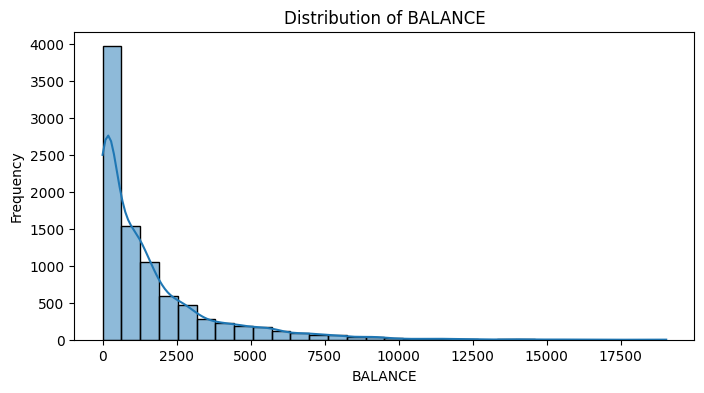

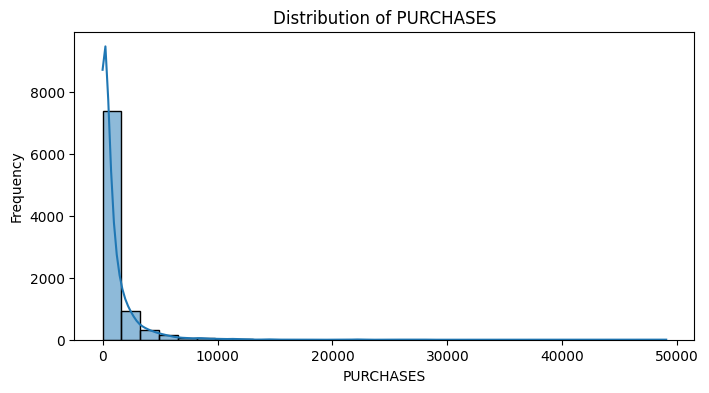

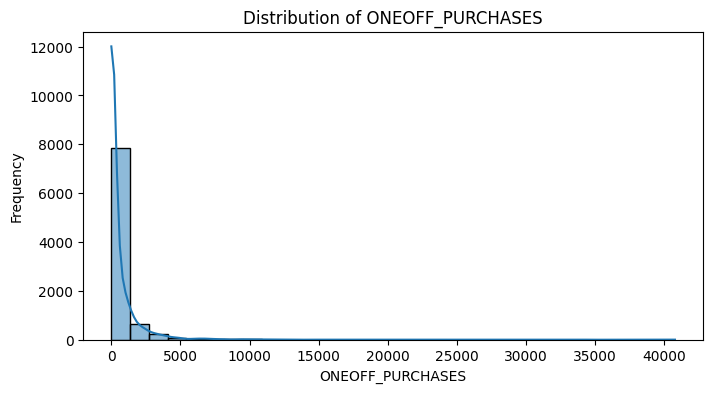

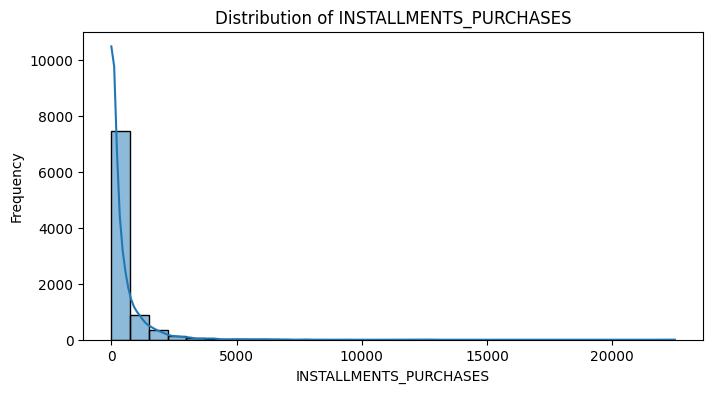

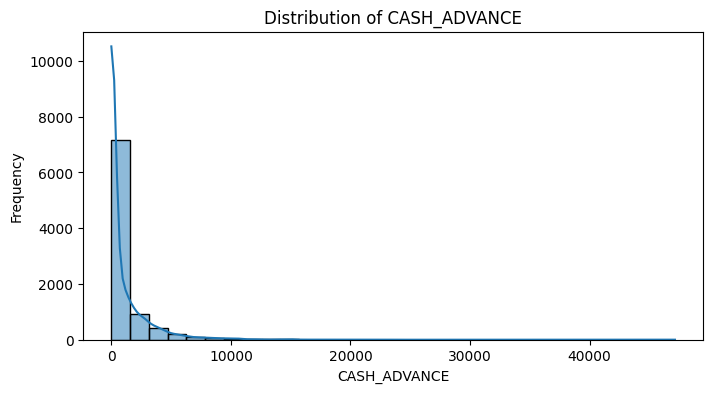

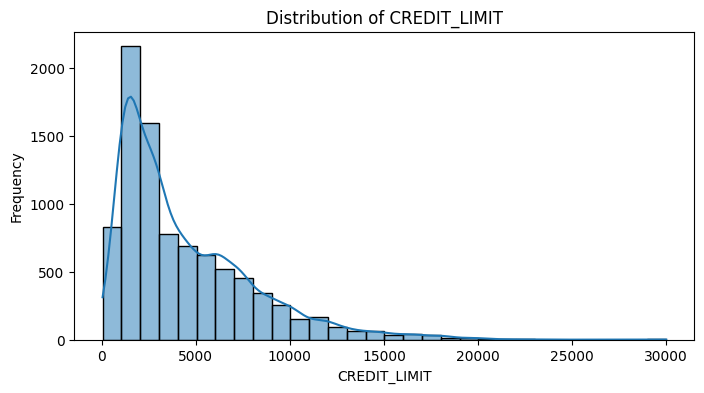

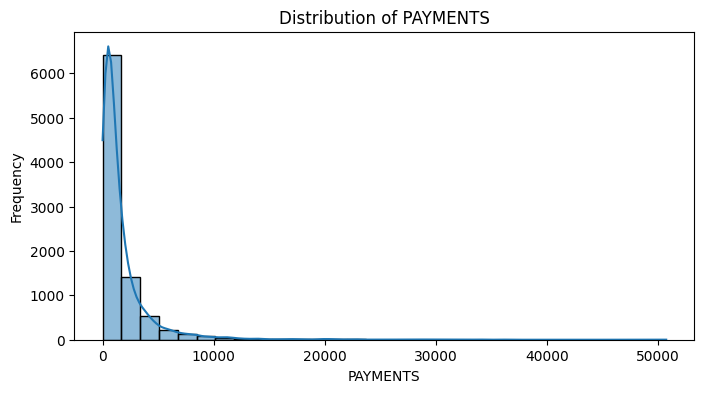

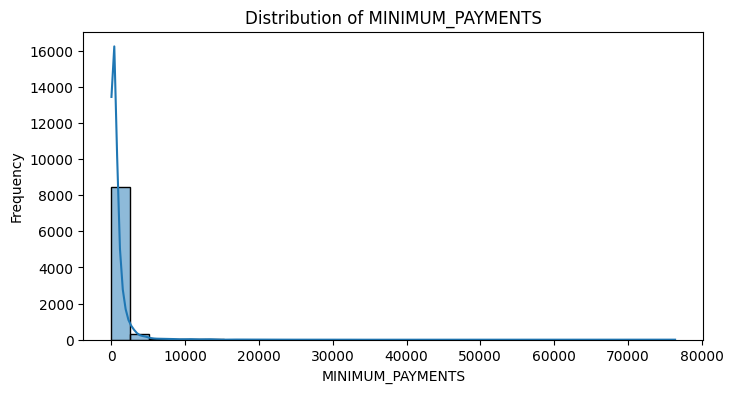

In [13]:
# Plot histograms for numerical features
for column in df_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

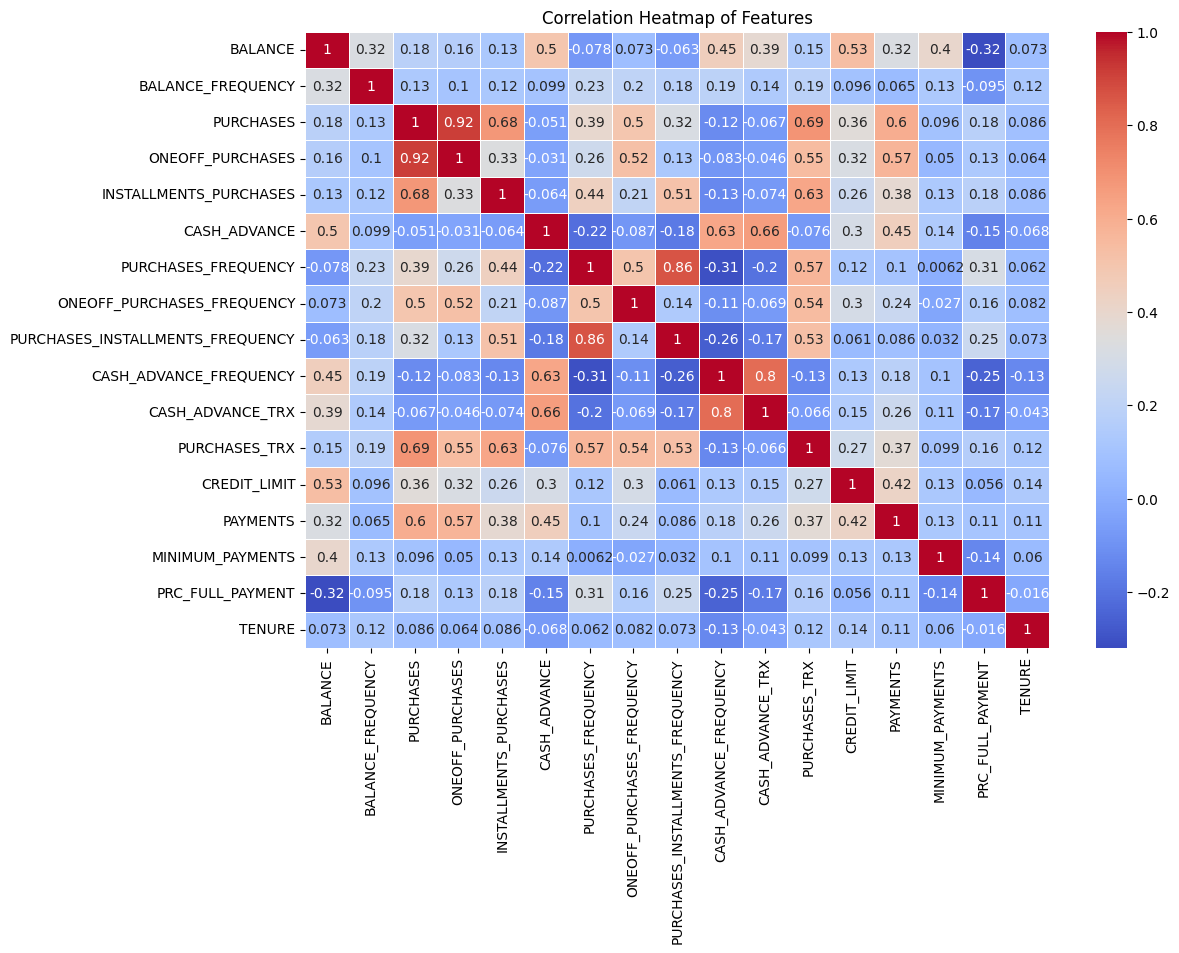

In [14]:
# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

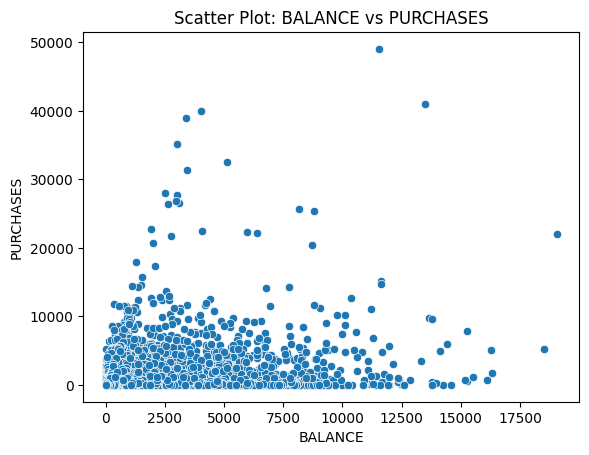

In [15]:
# Scatter plot of 'BALANCE' vs 'PURCHASES'
sns.scatterplot(x='BALANCE', y='PURCHASES', data=df)
plt.title('Scatter Plot: BALANCE vs PURCHASES')
plt.show()


In [16]:
skewed_columns = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 
                  'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
                  'PAYMENTS', 'MINIMUM_PAYMENTS']

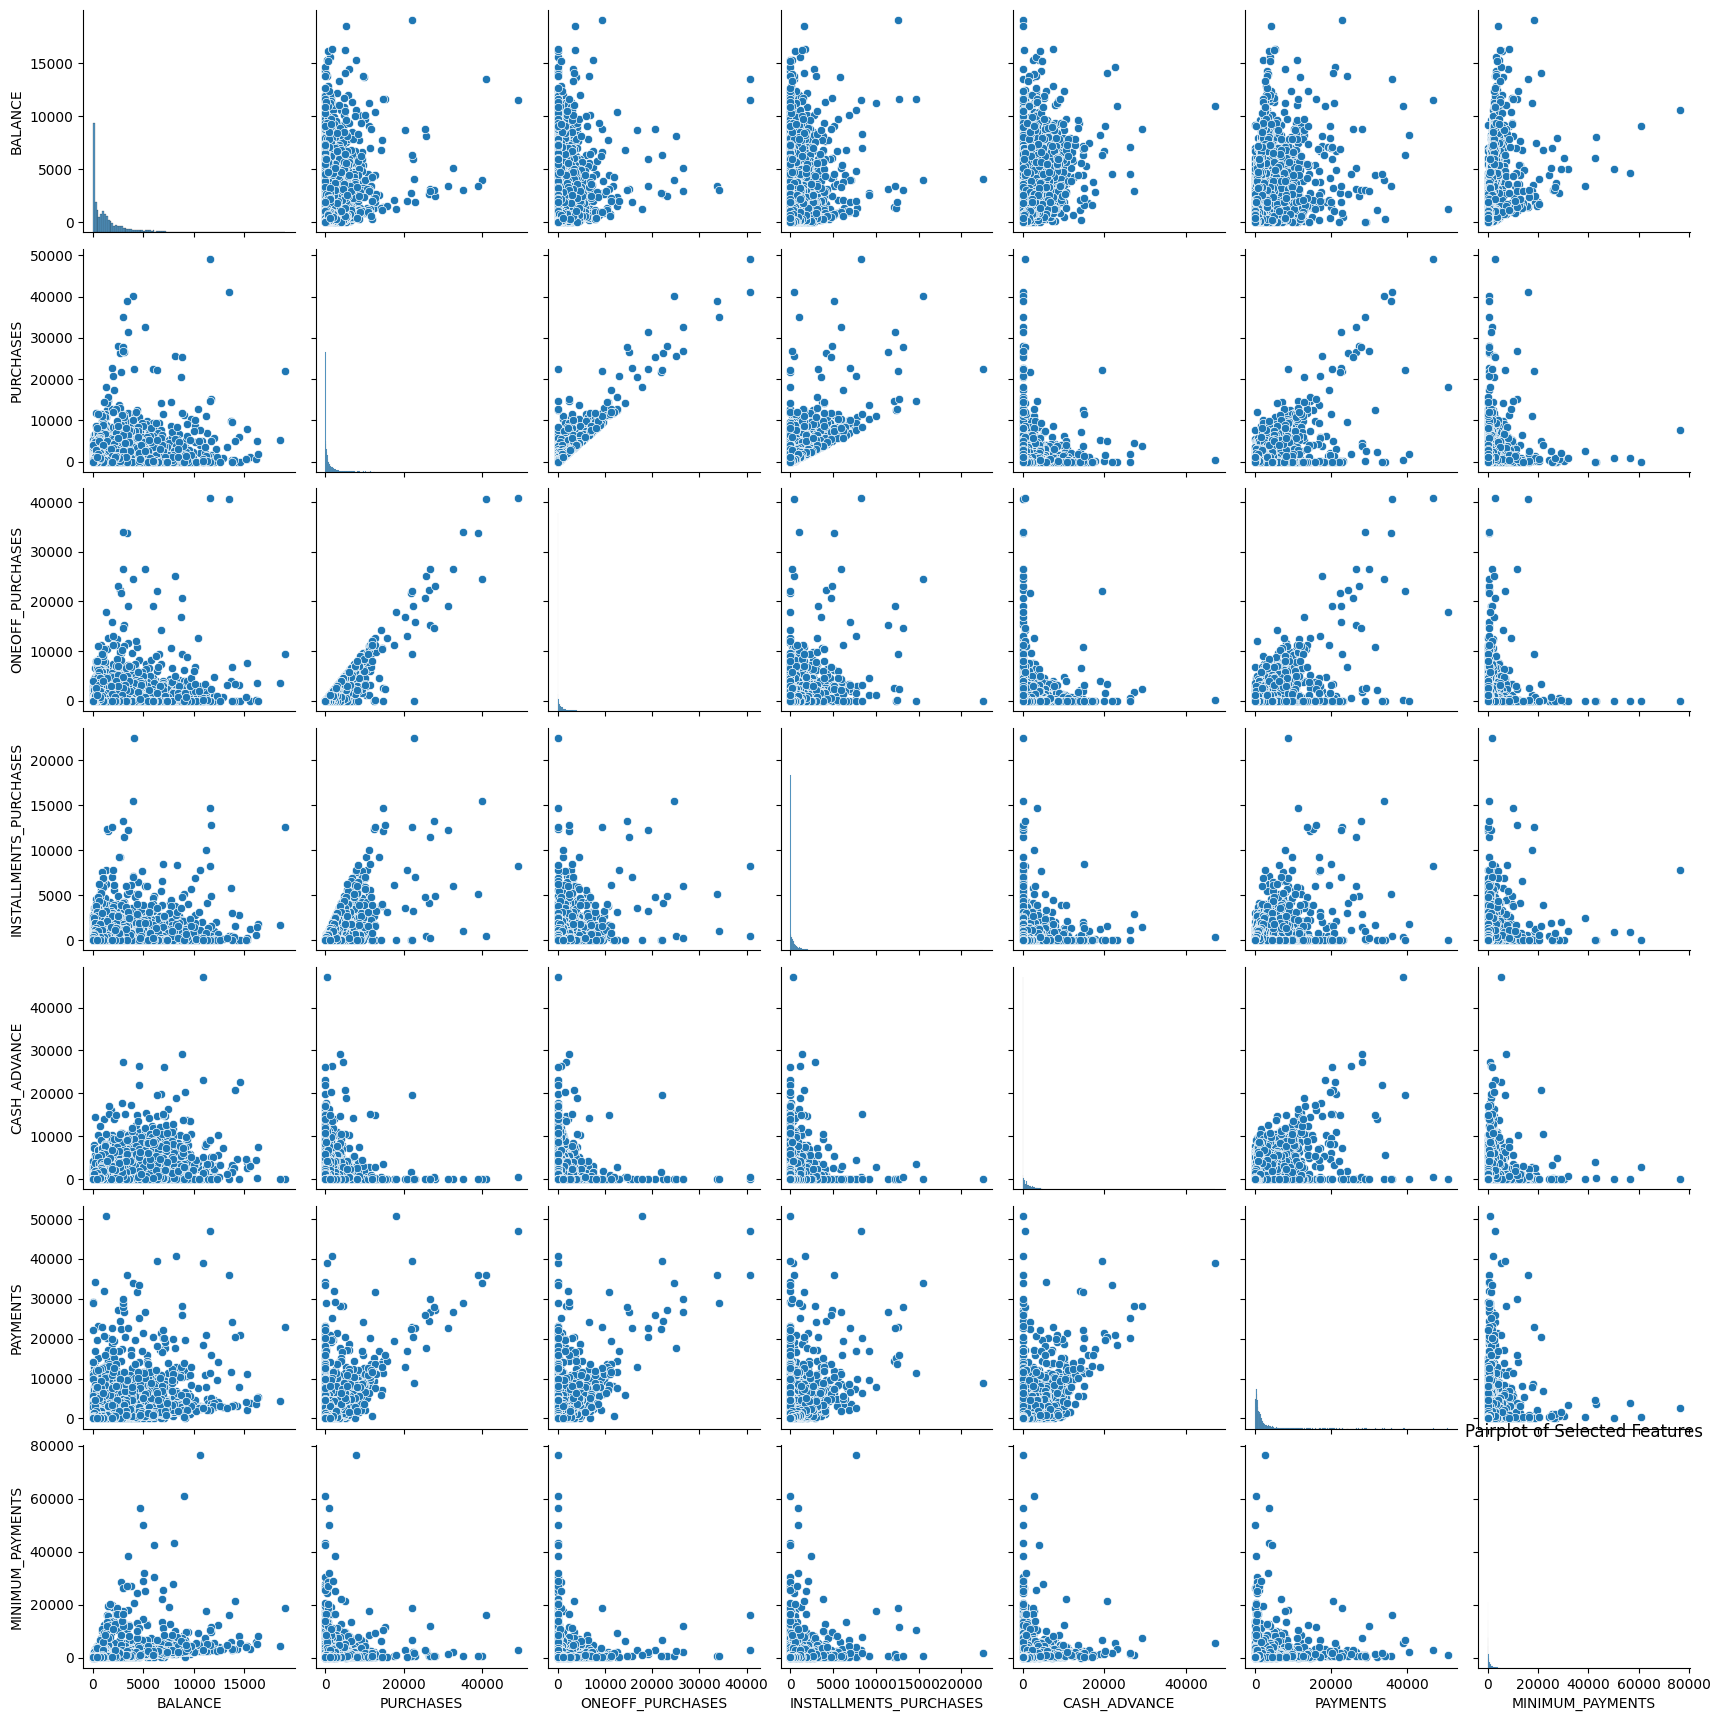

In [17]:
# Plot pairplot of selected features
sns.pairplot(df[skewed_columns[:7]]) 
plt.title('Pairplot of Selected Features')
plt.show()


## Data Preprocessing

### Outlier

In [18]:
# Filter only numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Calculate IQR only on numerical columns
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers using IQR
cleaned_df = df[~((df[numerical_cols] < (Q1 - 2.0 * IQR)) | (df[numerical_cols] > (Q3 + 2.0 * IQR))).any(axis=1)]
print(f"Data shape after outlier removal (2.0x IQR): {cleaned_df.shape}")

## 试过了1.5 删除的太多了 放宽到2.0试试


Data shape after outlier removal (2.0x IQR): (3458, 18)


### Feature Scaling

In [19]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_df[df_columns])

# Convert the scaled data to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df_columns)


### dimensionality reduction

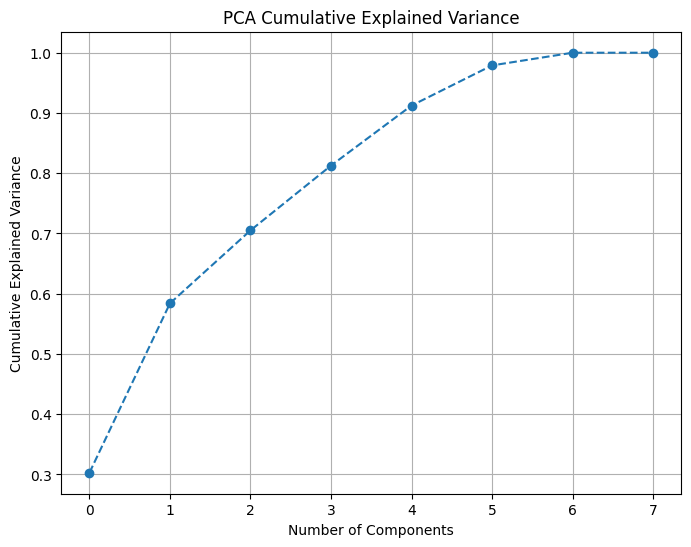

In [20]:
from sklearn.decomposition import PCA
# Initialize PCA
pca = PCA(n_components=None) 
pca.fit(scaled_df)

# Visualize the explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.grid(True)
plt.show()

Compoments = 3 时解释了80%的方差

In [21]:
# Initialize PCA with 3 components
n_components = 3
pca = PCA(n_components=n_components)

# Dimensionality reduction
pca_result = pca.fit_transform(scaled_df)

# Transform the result to a DataFrame
pca_df = pd.DataFrame(pca_result, columns=[f'PCA_{i+1}' for i in range(n_components)])

# Check 
pca_df.head()

,PCA_1,PCA_2,PCA_3
0,-2.033253,-0.914510,-0.062477
1,-1.659283,-0.228936,0.011877
2,-0.185088,-0.212658,-0.792960
3,0.998995,-1.067478,-0.078055
4,1.468474,-2.493864,-0.052734


## Clustering Algorithms

### ① K-Means Clustering

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [23]:
X = pca_df

In [24]:
inertia = []

In [25]:
# Iterate over a range of possible clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X) 
    inertia.append(kmeans.inertia_)

In [26]:
inertia

[19505.477271153504,
 13815.752592596284,
 9175.285028883174,
 7665.183642230948,
 6565.456961257108,
 5886.266220683081,
 5029.9488898387535,
 4545.6964327154465,
 4297.87090596558,
 4050.3911886295436]

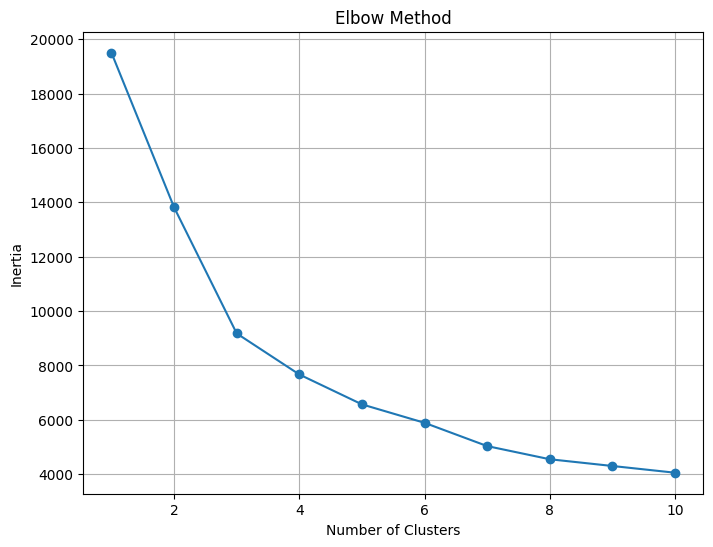

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(inertia) + 1), inertia, marker='o')  # Ensure x and y dimensions match
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()